In [20]:
# Step 1: Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn's own theme 
sns.set_theme(style="whitegrid")

In [22]:
# Step 2: Load Dataset

df = pd.read_csv(r"C:\Users\HP\Downloads\train.csv\train.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (9800, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [24]:
# Explore Data

print(df.info())       # Column names, datatypes, null values
print(df.describe())   # Summary stats (mean, min, max)
print(df.isnull().sum())  # Missing values check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [26]:
# Step 4: Handle Dates

df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")
df['Month'] = df['Order Date'].dt.to_period('M')
df['Week'] = df['Order Date'].dt.to_period('W')

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64


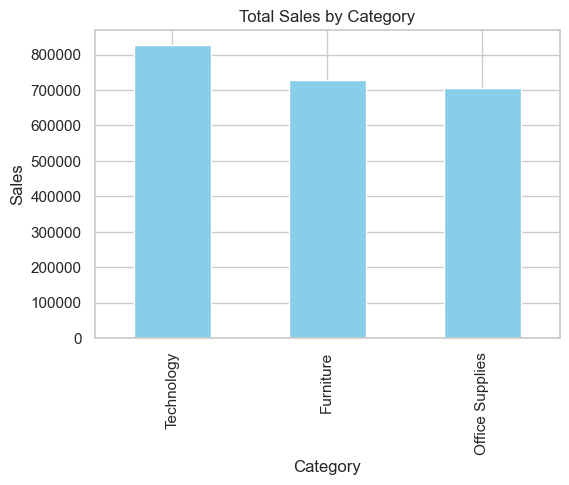

In [28]:
# Step 5: Top-Selling Categories

category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
print(category_sales)

category_sales.plot(kind="bar", figsize=(6,4), color="skyblue")
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.show()

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


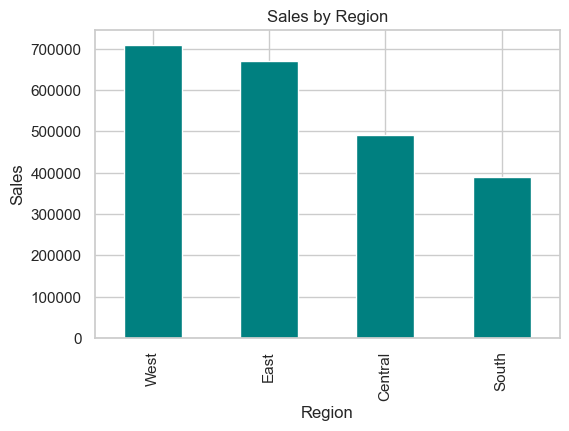

In [30]:
# Step 6: Regional Sales

region_perf = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
print(region_perf)

region_perf.plot(kind="bar", figsize=(6,4), color="teal")
plt.title("Sales by Region")
plt.ylabel("Sales")
plt.show()

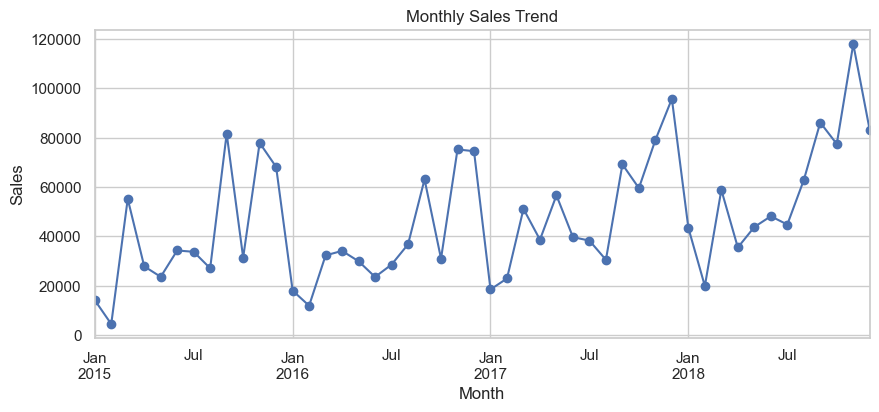

In [36]:
#Step 7: Monthly Sales Trend

monthly_sales = df.groupby("Month")["Sales"].sum()
monthly_sales.plot(kind="line", marker="o", figsize=(10,4))
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()

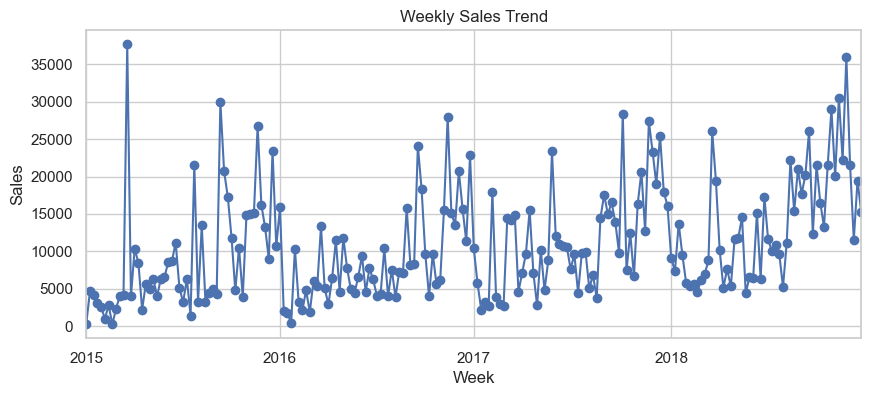

In [38]:
# Step 8: Weekly Sales Trend

weekly_sales = df.groupby("Week")["Sales"].sum()
weekly_sales.plot(kind="line", marker="o", figsize=(10,4))
plt.title("Weekly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Week")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6668\3186043108.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Blues")


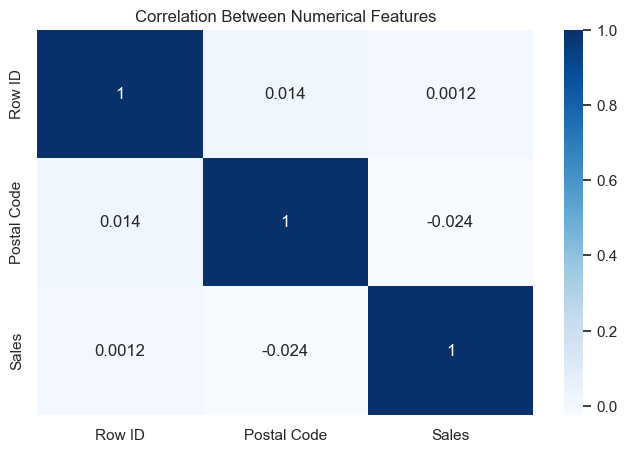

In [40]:
# Step 9: Correlation Heatmap

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Numerical Features")
plt.show()

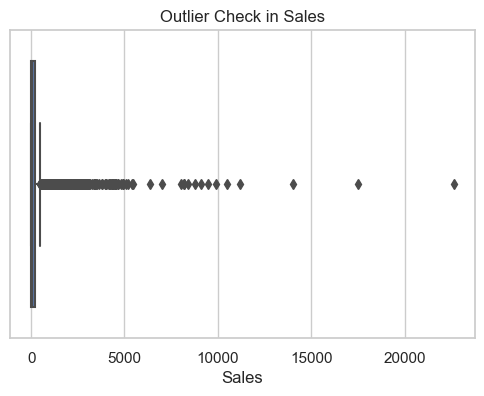

In [42]:
# Step 10: Outlier Detection

plt.figure(figsize=(6,4))
sns.boxplot(x=df["Sales"])
plt.title("Outlier Check in Sales")
plt.show()